In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/fall22_hw/isye6414_group_project/ashish


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
# plt.ion()
%matplotlib inline

### Read data Spatial analysis of Artists 

In [3]:
df_org = pd.read_csv("top_500_artists_deduplicate.csv")
df_org.shape

(4576, 15)

In [4]:
df_org.sort_values(by="popularity",ascending=False).head(7)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
280,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),Sam Smith,2022-09-22,156943,100,0.714,0.01300,0.472,0.000005,0.2660,-7.375,0.0864,131.121,4
2470,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,2022-07-06,198937,99,0.621,0.01250,0.782,0.033000,0.2300,-5.548,0.0440,128.033,4
1632,La Bachata,La Bachata,Manuel Turizo,2022-05-26,162637,98,0.835,0.58300,0.679,0.000002,0.2180,-5.329,0.0364,124.980,4
10,Me Porto Bonito,Un Verano Sin Ti,Bad Bunny,2022-05-06,178567,98,0.911,0.09010,0.712,0.000027,0.0933,-5.105,0.0817,92.005,4
223,I'm Good (Blue),I'm Good (Blue),David Guetta,2022-08-26,175238,98,0.561,0.00383,0.965,0.000007,0.3710,-3.673,0.0343,128.040,4
11,Tití Me Preguntó,Un Verano Sin Ti,Bad Bunny,2022-05-06,243716,98,0.650,0.09930,0.715,0.000291,0.1260,-5.198,0.2530,106.672,4
611,I Ain't Worried,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,2022-05-13,148485,97,0.704,0.08260,0.797,0.000745,0.0546,-5.927,0.0475,139.994,4


In [5]:
df_org["release_date"] = pd.to_datetime(df_org["release_date"])
df_org["days_since"] = df_org["release_date"].max() - df_org["release_date"]
df_org["days_since"] = df_org["days_since"].dt.days

### Get artist average features

In [6]:
numeric_cols = list(df_org.select_dtypes(include=np.number).columns)
numeric_cols = [x for x in numeric_cols if x not in ["days_since"]]
numeric_cols

['length',
 'popularity',
 'danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'time_signature']

In [7]:
arist_grp = df_org.groupby(["artist"])[numeric_cols].agg(["count","mean","max","min"])
arist_grp.head()

length                                popularity                 \
             count           mean     max     min      count       mean max   
artist                                                                        
$NOT             1  183982.000000  183982  183982          1  64.000000  64   
$uicideboy$     10  169057.800000  238145  111020         10  78.300000  82   
2 Chainz         5  218023.800000  255560  158627          5  65.600000  70   
21 Savage       11  219390.454545  288624  172800         11  77.454545  83   
220 KID          1  166924.000000  166924  166924          1  68.000000  68   

                danceability            ... speechiness         tempo  \
            min        count      mean  ...         max     min count   
artist                                  ...                             
$NOT         64            1  0.841000  ...      0.2220  0.2220     1   
$uicideboy$  75           10  0.787800  ...      0.5520  0.0349    10   
2 Chainz     60            5  0.725000  ...      0.4250  0.1480     5   
21 Savage    71           11  0.832182  ...      0.3960  0.0860    11   
220 KID      68            1  0.715000  ...      0.0365  0.0365     1   

                                          time_signature               
                   mean      max      min          count mean max min  
artist                                                                 
$NOT          94.528000   94.528   94.528              1  4.0   4   4  
$uicideboy$  110.560300  140.078   75.003             10  4.1   5   4  
2 Chainz     109.628400  171.999   73.003              5  4.0   4   4  
21 Savage    124.922273  172.080   75.016             11  4.0   4   4  
220 KID      123.954000  123.954  123.954              1  4.0   4   4  

[5 rows x 44 columns]

In [8]:
arist_grp.columns = ["_".join(x) for x in arist_grp.columns]

In [9]:
arist_grp

,length_count,length_mean,length_max,length_min,popularity_count,popularity_mean,popularity_max,popularity_min,danceability_count,danceability_mean,...,speechiness_max,speechiness_min,tempo_count,tempo_mean,tempo_max,tempo_min,time_signature_count,time_signature_mean,time_signature_max,time_signature_min
artist,,,,,,,,,,,,,,,,,,,,,
$NOT,1,183982.000000,183982,183982,1,64.000000,64,64,1,0.841000,...,0.2220,0.2220,1,94.528000,94.528,94.528,1,4.000000,4,4
$uicideboy$,10,169057.800000,238145,111020,10,78.300000,82,75,10,0.787800,...,0.5520,0.0349,10,110.560300,140.078,75.003,10,4.100000,5,4
2 Chainz,5,218023.800000,255560,158627,5,65.600000,70,60,5,0.725000,...,0.4250,0.1480,5,109.628400,171.999,73.003,5,4.000000,4,4
21 Savage,11,219390.454545,288624,172800,11,77.454545,83,71,11,0.832182,...,0.3960,0.0860,11,124.922273,172.080,75.016,11,4.000000,4,4
220 KID,1,166924.000000,166924,166924,1,68.000000,68,68,1,0.715000,...,0.0365,0.0365,1,123.954000,123.954,123.954,1,4.000000,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
benny blanco,8,174771.250000,223542,154808,8,68.750000,88,58,8,0.642000,...,0.3620,0.0317,8,117.322125,155.009,89.949,8,3.625000,4,1
blackbear,6,202999.666667,245172,174066,6,75.333333,82,69,6,0.705667,...,0.0767,0.0522,6,131.419167,144.871,111.001,6,3.333333,4,1
blink-182,10,186430.900000,249626,148360,10,74.300000,83,69,10,0.496000,...,0.0954,0.0339,10,141.460400,193.155,95.594,10,4.000000,4,4


<AxesSubplot:>

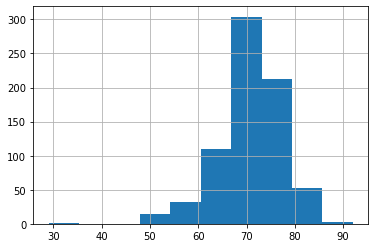

In [10]:
arist_grp["popularity_mean"].hist()

In [11]:
arist_grp["popularity_mean_bucket"] = np.where(arist_grp["popularity_mean"]<=60,"a.<=60",\
                                       np.where(arist_grp["popularity_mean"]<=70,"b.<=70",\
                                               np.where(arist_grp["popularity_mean"]<=75,"c.<=75",\
                                                        np.where(arist_grp["popularity_mean"]<=80,"d.<=80","e.>80"))))

### Plot Artists

In [12]:
# N=10

# top_n_artists = arist_grp.sort_values(by="popularity_mean",ascending=False).head(N).reset_index()
# bottom_n_artists = arist_grp.sort_values(by="popularity_mean",ascending=True).head(N).reset_index()
# artist_subset = pd.concat([top_n_artists,bottom_n_artists])
# artist_subset.shape

In [13]:
#remove artists with only 1 song in data
artist_subset = arist_grp.loc[arist_grp["length_count"]>1]
arist_grp.shape,artist_subset.shape

((729, 45), (532, 45))

In [14]:
def my_plot(df,x,y, name=False):
    df1 = df.copy()
    df1[x]=(df1[x]-df1[x].min())/(df1[x].max()-df1[x].min())
    df1[y]=(df1[y]-df1[y].min())/(df1[y].max()-df1[y].min())
    sns.lmplot(data=df, x=x, y=y, fit_reg=True,
           aspect =2, hue="popularity_mean_bucket" ,ci=0)
    
    def _label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            if i%50==0:
                ax.text(point['x']+.015, point['y'], str(point['val']))
    
    plt.title(f"{y} vs {x}")
    if name:
        _label_point(df1[x], df1[y], df.artist, plt.gca())
    plt.show()

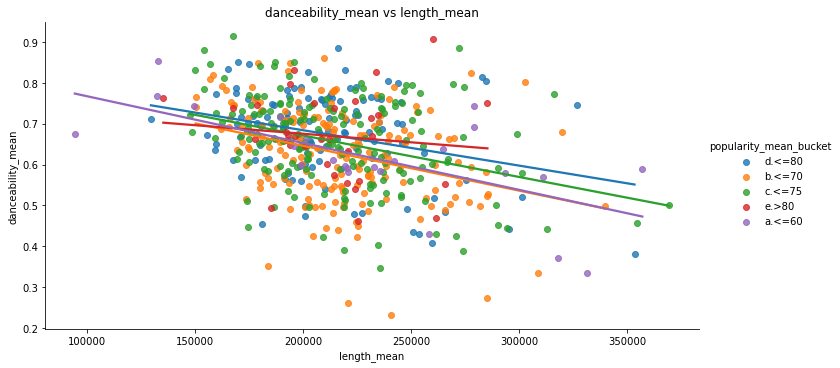

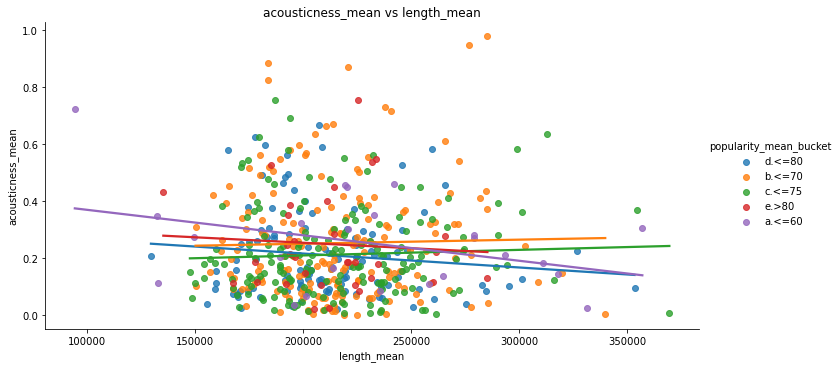

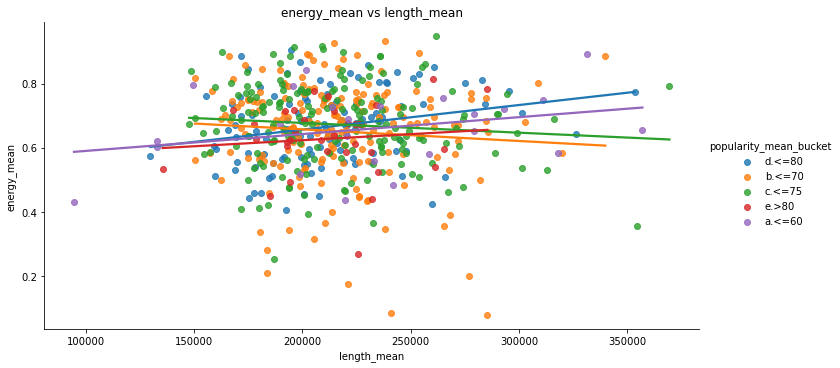

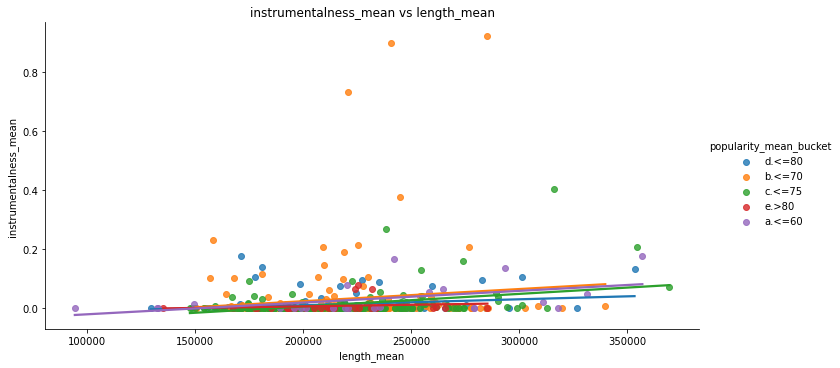

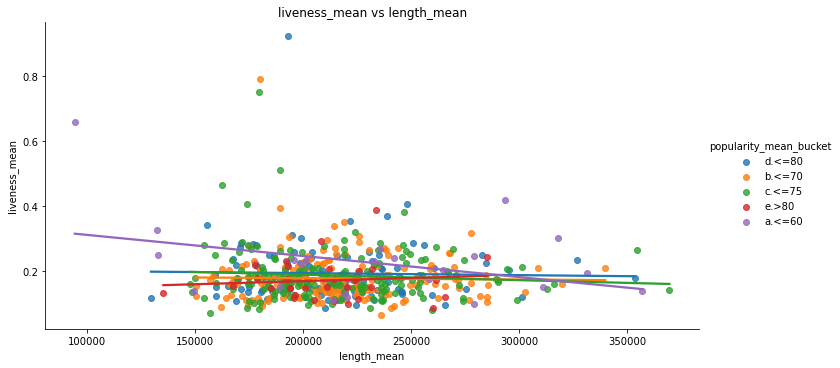

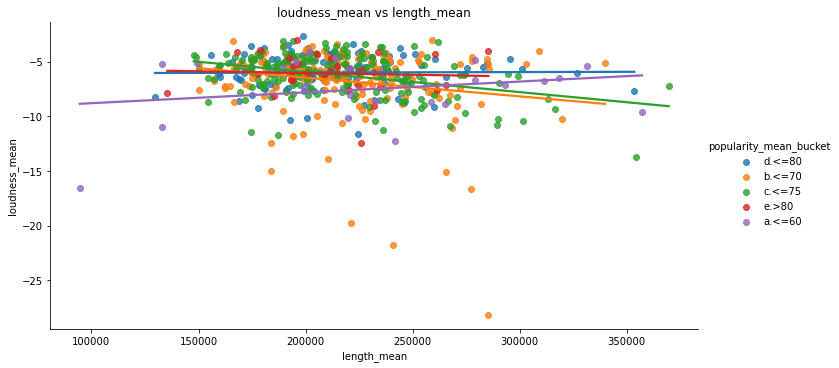

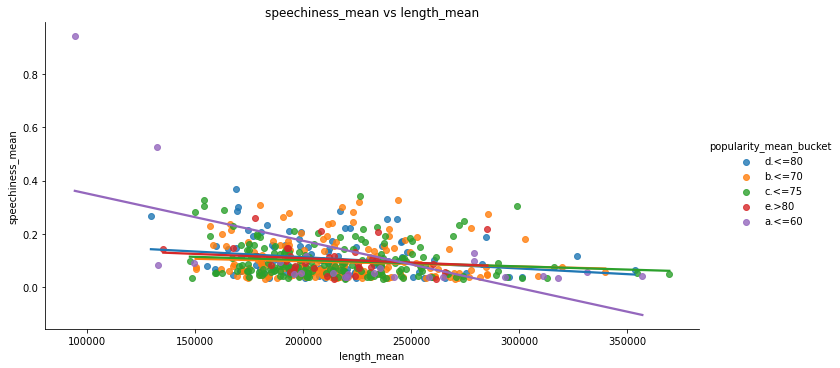

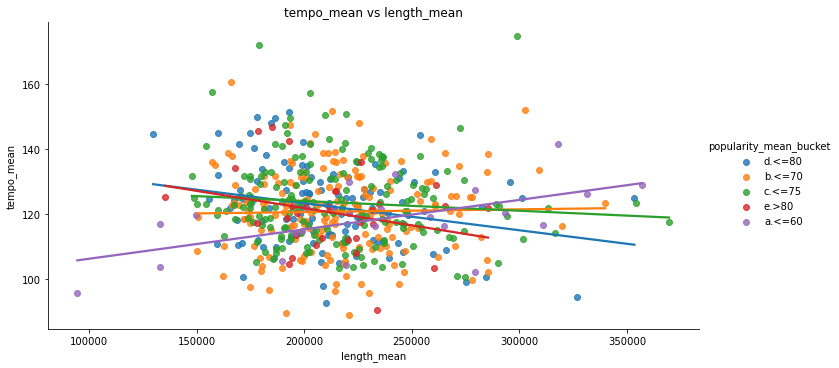

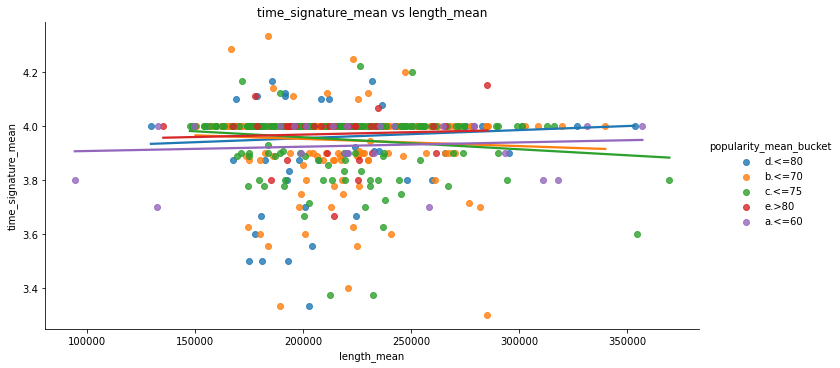

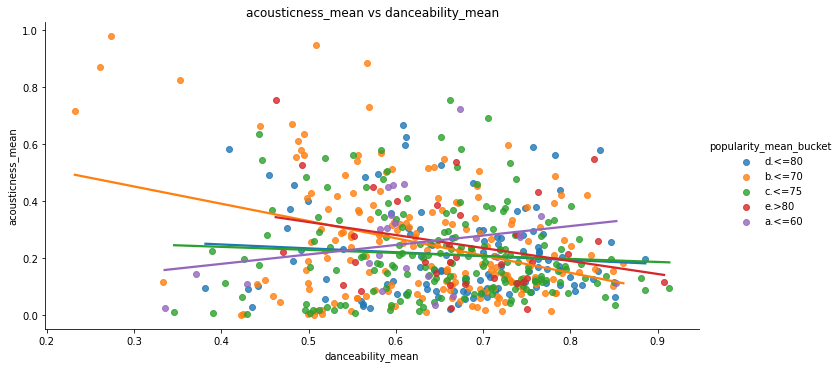

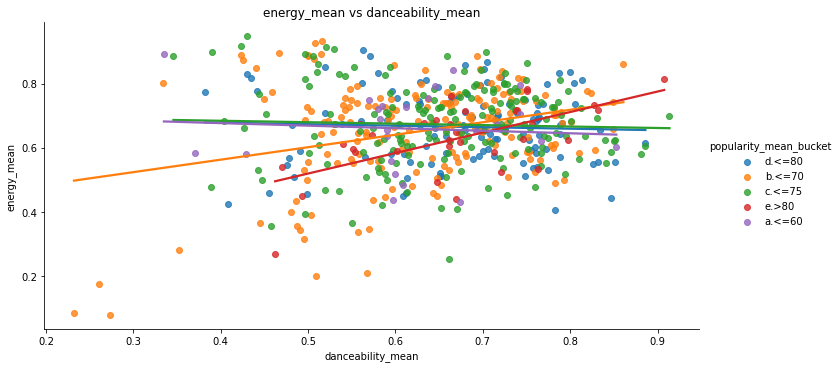

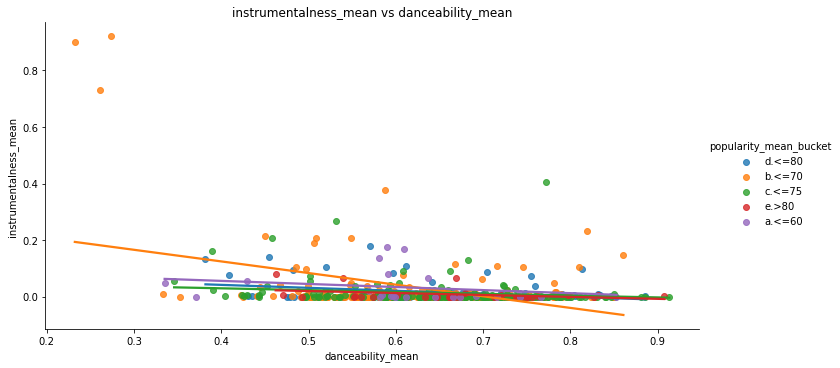

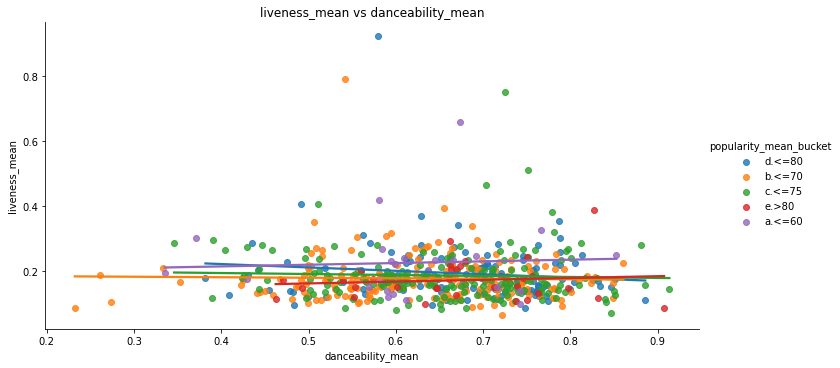

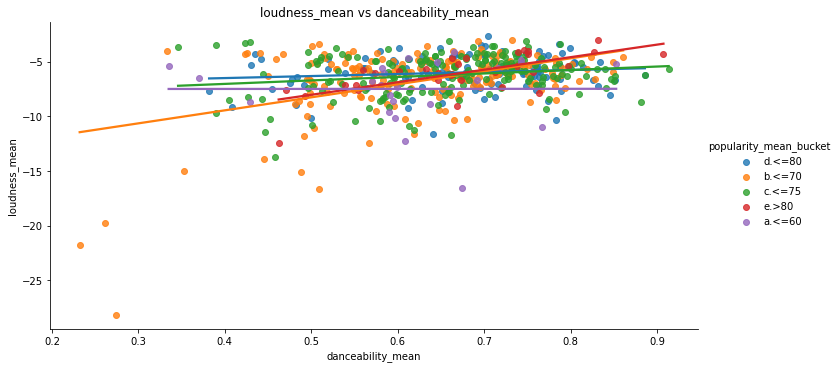

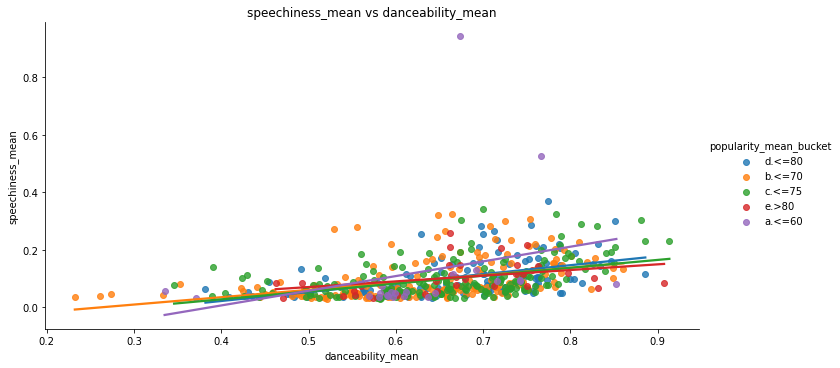

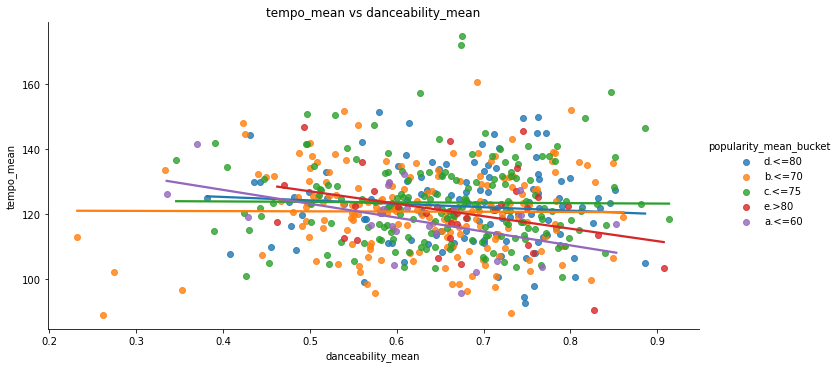

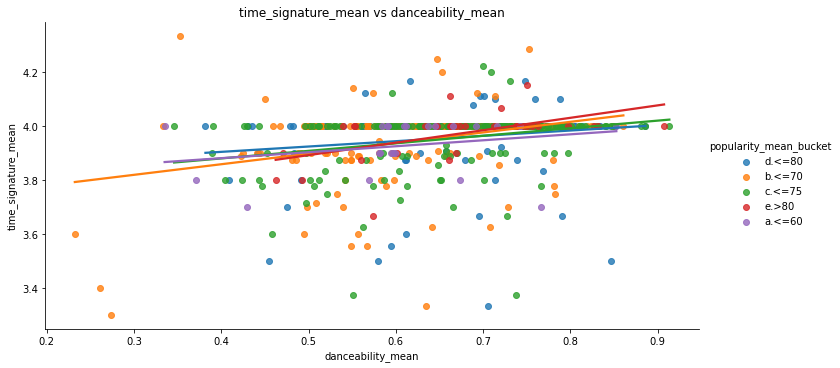

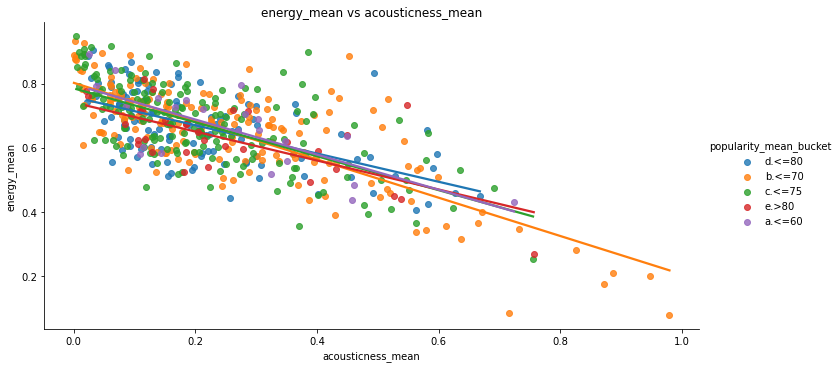

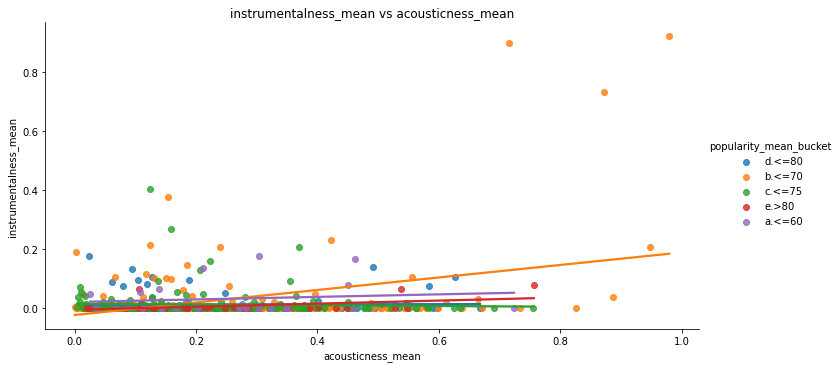

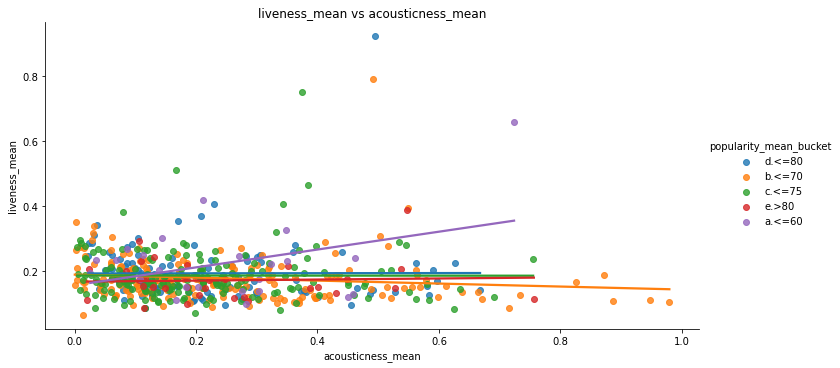

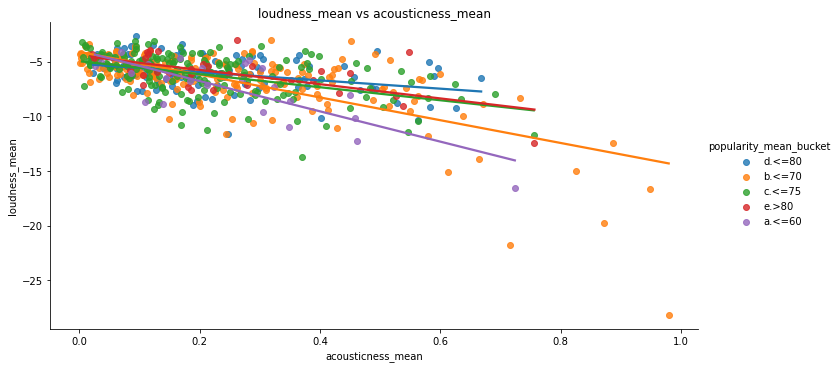

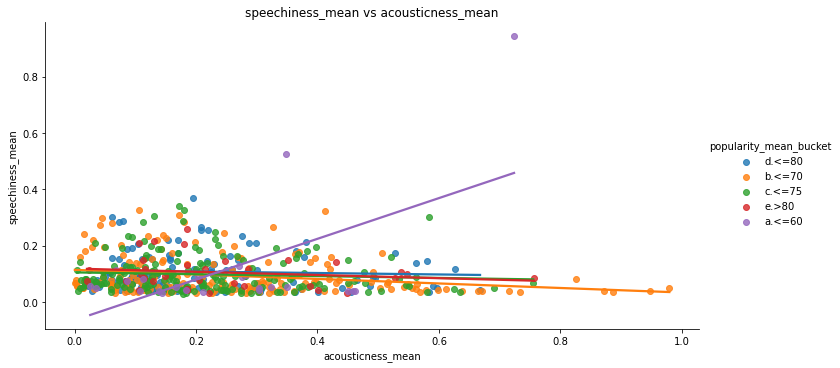

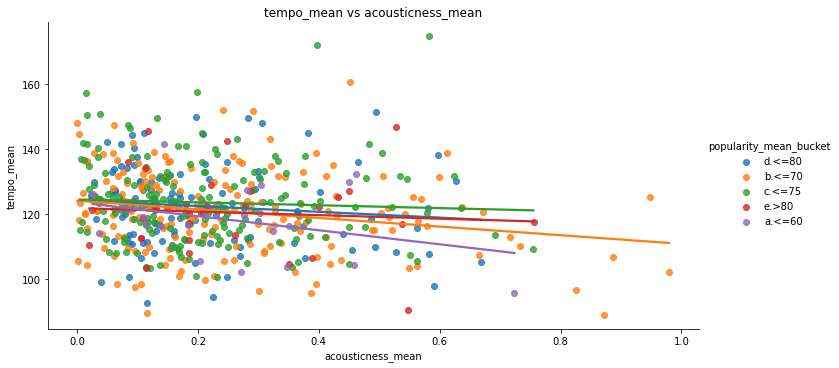

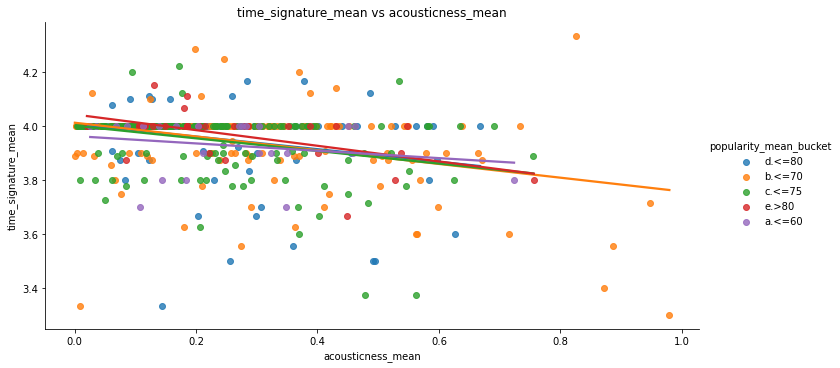

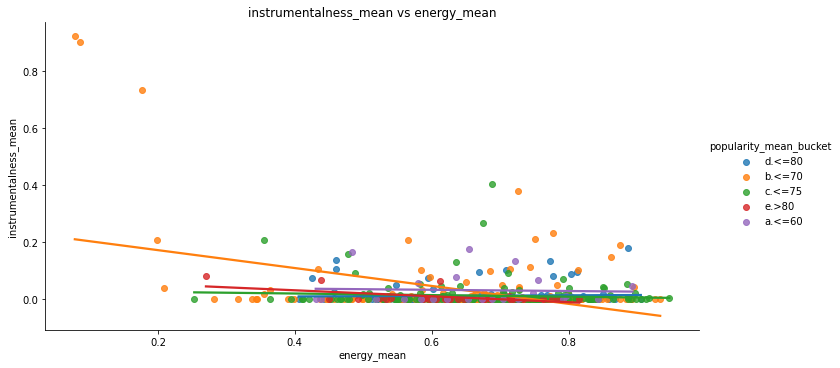

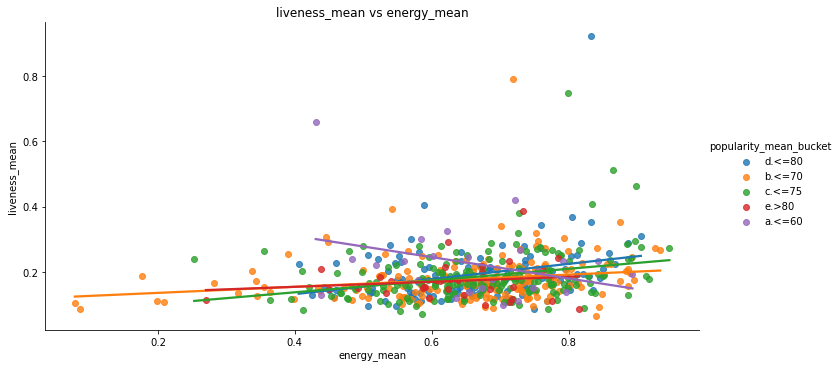

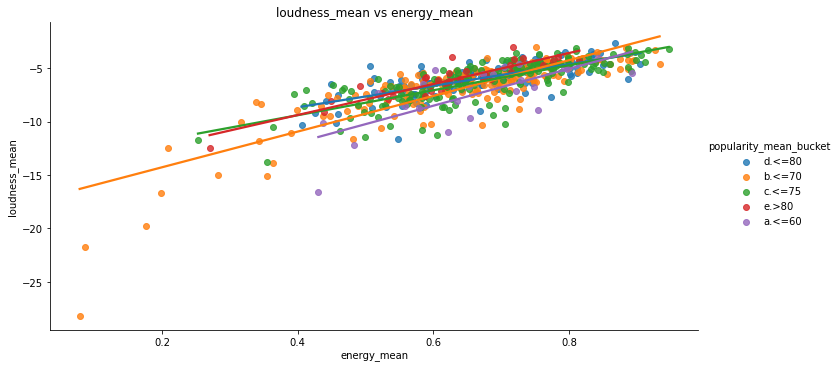

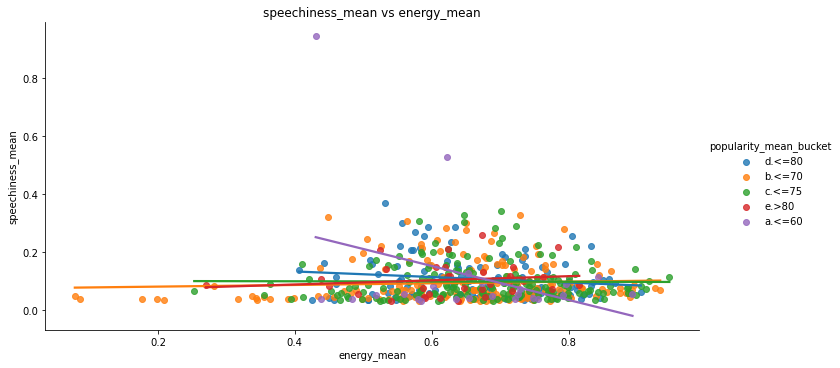

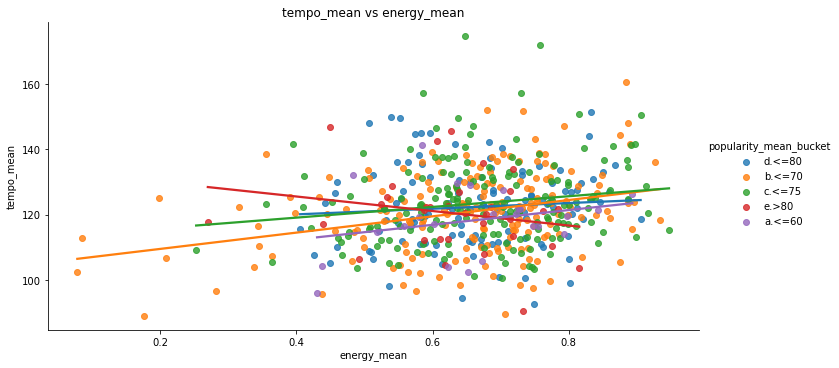

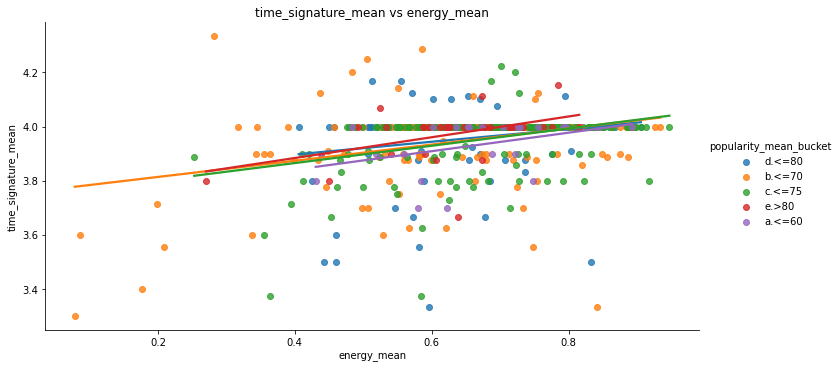

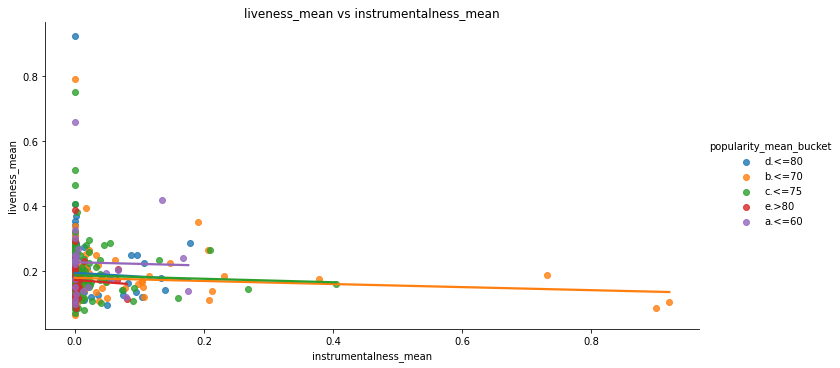

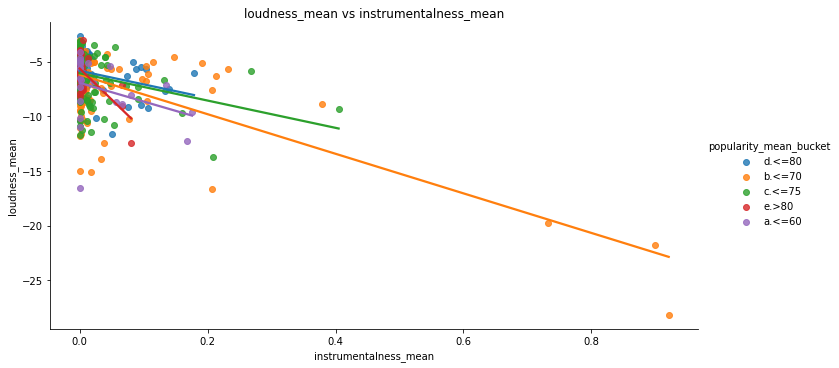

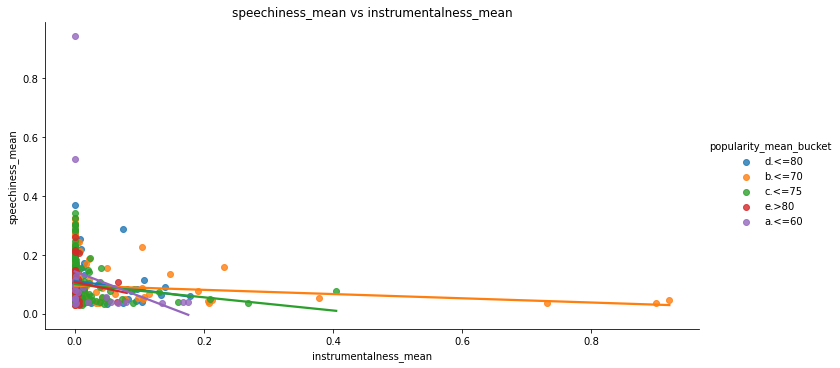

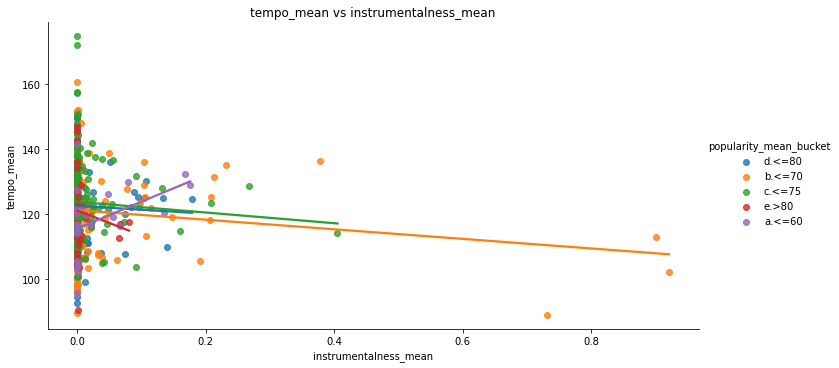

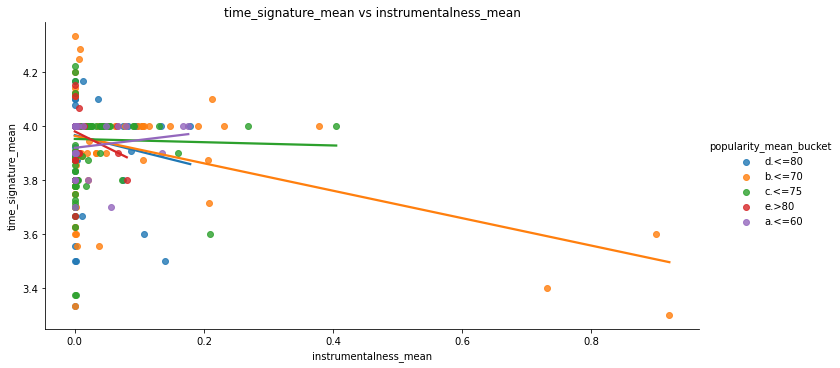

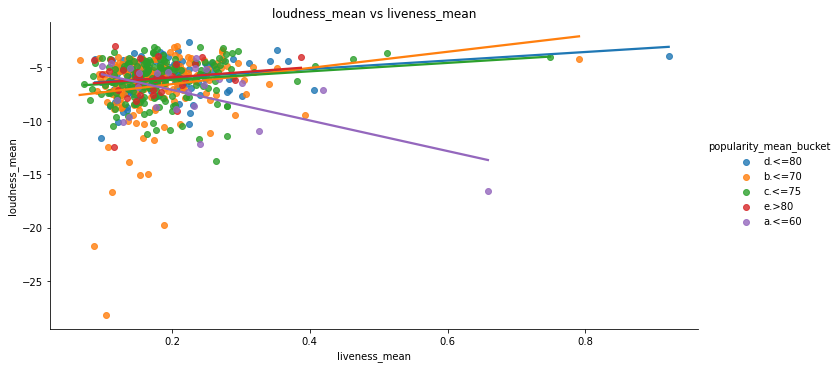

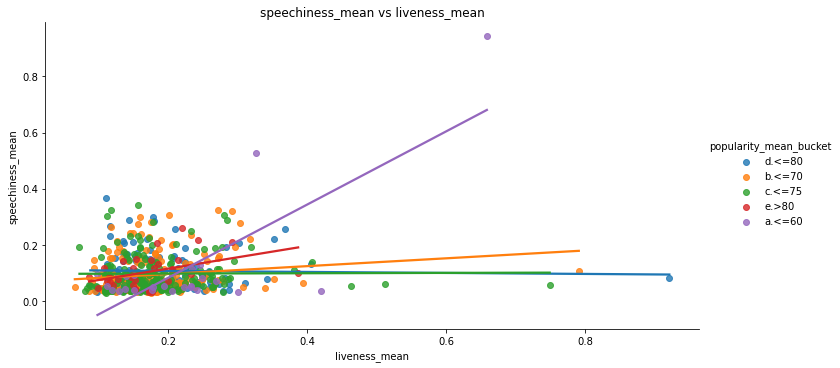

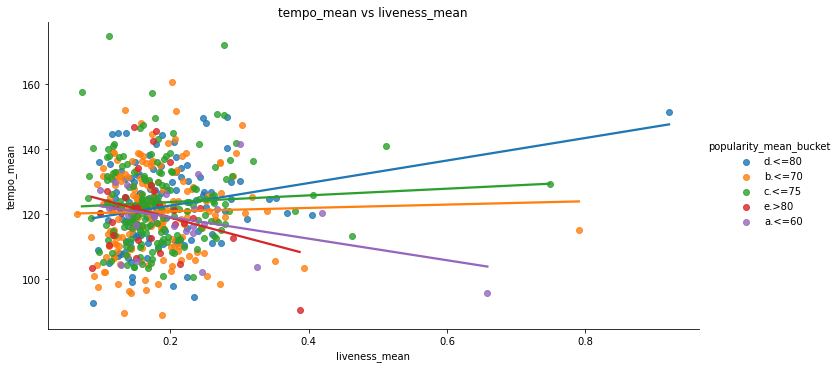

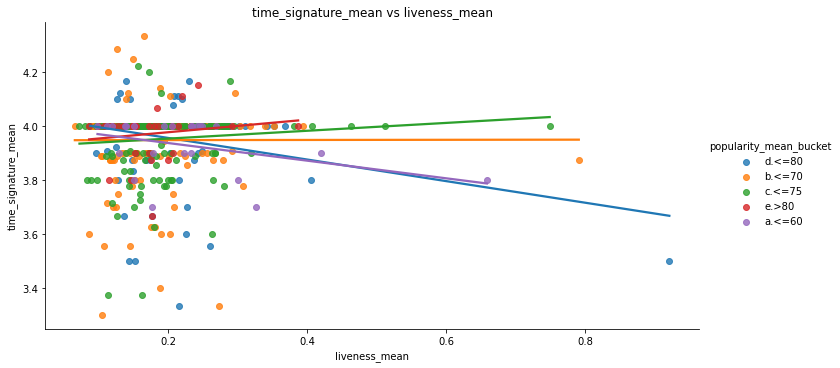

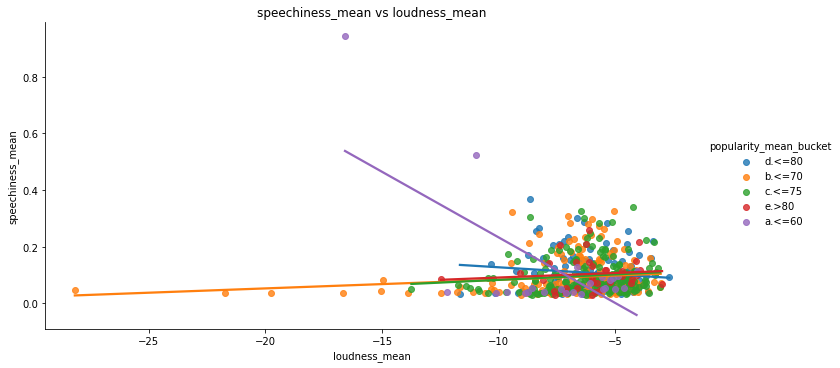

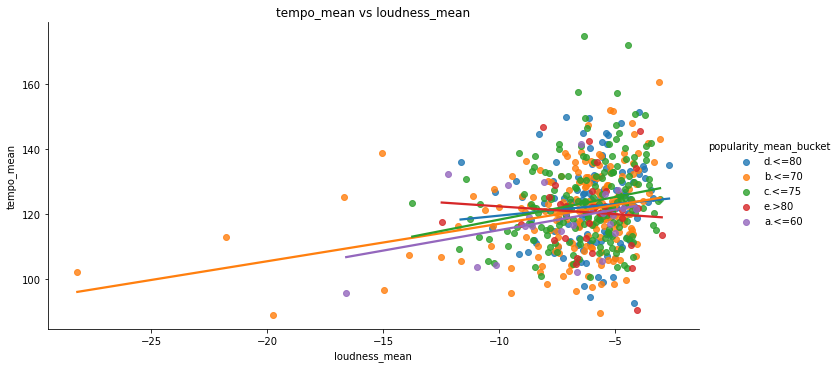

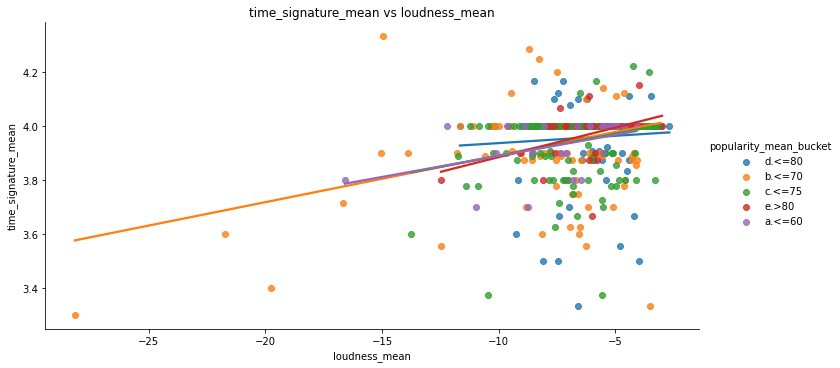

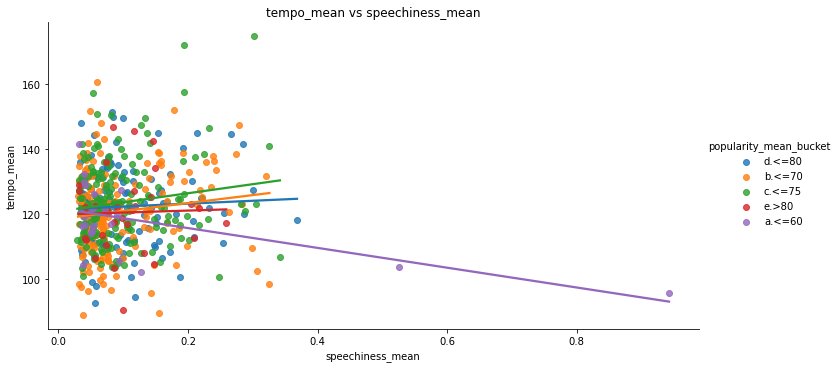

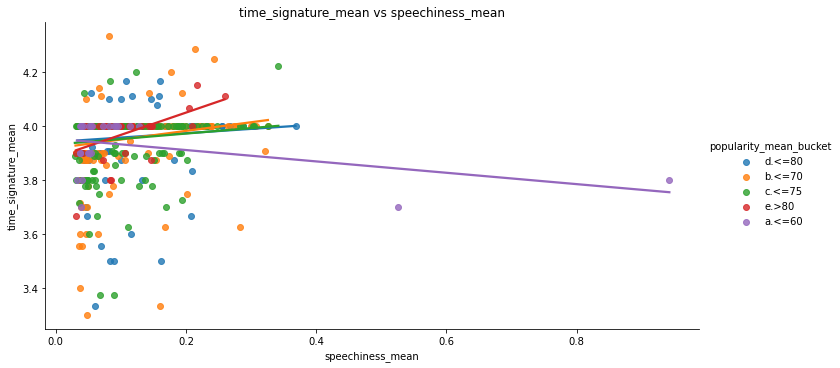

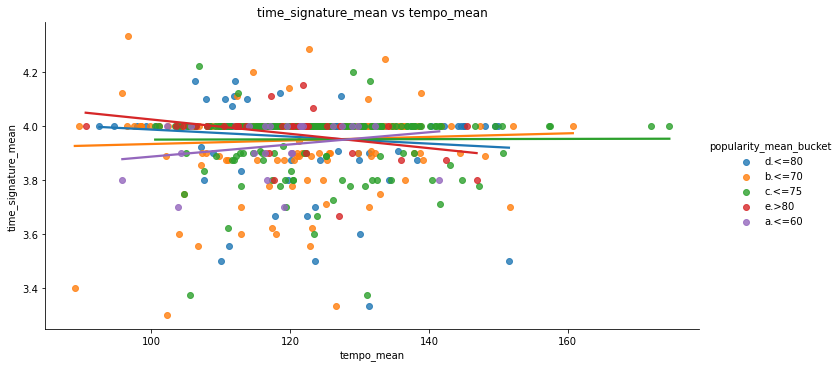

In [16]:
for x,y in combinations(numeric_cols,2):
    if "popularity" in x or "popularity" in y:
        continue
    x1=x+"_mean"
    y1=y+"_mean"
    my_plot(artist_subset,x1,y1)

### Find Splits basis Decision Tree

In [17]:
def pandas_entropy(column):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    return -(vc * np.log(vc)).sum()

In [18]:
pandas_entropy(artist_subset["popularity_mean_bucket"])

1.3774706731082074

In [19]:
def my_decision_tree(df,x1,x2):
    clf = DecisionTreeClassifier(max_depth=2)
    X=df[[x1,x2]]
    Y=df[["popularity_mean_bucket"]]
    clf = clf.fit(X, Y)
    y_pred = clf.predict(X)
    entropy_reduction = pandas_entropy(df["popularity_mean_bucket"])-pandas_entropy(y_pred)
    acc = (df["popularity_mean_bucket"]==y_pred).mean()
    return (clf,entropy_reduction,acc)

In [20]:
result_dict = {}
for x1,x2 in combinations(numeric_cols,2):
    if "popularity" in x1 or "popularity" in x2:
        continue
    x1=x1+"_mean"
    x2=x2+"_mean"
    dt,entropy_drop,acc = my_decision_tree(artist_subset,x1,x2)
    result_dict[(x1,x2)]=[dt,entropy_drop,acc]

In [21]:
result_df = pd.DataFrame.from_dict(result_dict,orient="index")
result_df.columns=["classifier","entropy_red","acc"]

In [22]:
result_df.sort_values(by="acc",ascending=False).head()

,classifier,entropy_red,acc
"(length_mean, speechiness_mean)",DecisionTreeClassifier(max_depth=2),0.644814,0.407895
"(danceability_mean, speechiness_mean)",DecisionTreeClassifier(max_depth=2),0.693510,0.402256
"(liveness_mean, speechiness_mean)",DecisionTreeClassifier(max_depth=2),0.687153,0.402256
"(speechiness_mean, time_signature_mean)",DecisionTreeClassifier(max_depth=2),0.809025,0.400376
"(speechiness_mean, tempo_mean)",DecisionTreeClassifier(max_depth=2),0.809025,0.400376


In [23]:
result_df.sort_values(by="entropy_red",ascending=False).head()

,classifier,entropy_red,acc
"(length_mean, acousticness_mean)",DecisionTreeClassifier(max_depth=2),1.280063,0.349624
"(length_mean, loudness_mean)",DecisionTreeClassifier(max_depth=2),1.229577,0.351504
"(length_mean, instrumentalness_mean)",DecisionTreeClassifier(max_depth=2),1.225555,0.351504
"(energy_mean, loudness_mean)",DecisionTreeClassifier(max_depth=2),1.211377,0.357143
"(loudness_mean, tempo_mean)",DecisionTreeClassifier(max_depth=2),1.198789,0.362782


### Plot the Split

length_mean speechiness_mean


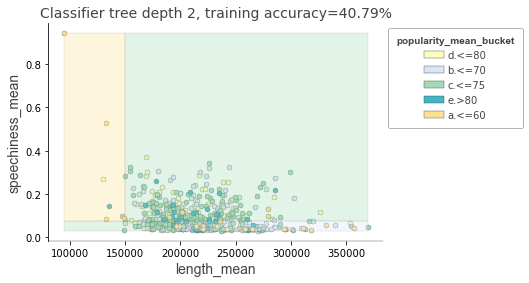

|--- feature_1 <= 0.07
|   |--- feature_0 <= 195173.22
|   |   |--- class: 2
|   |--- feature_0 >  195173.22
|   |   |--- class: 1
|--- feature_1 >  0.07
|   |--- feature_0 <= 149865.46
|   |   |--- class: 4
|   |--- feature_0 >  149865.46
|   |   |--- class: 2



In [31]:
from dtreeviz.trees import *

x1,x2 = ("length_mean", "speechiness_mean")
print (x1,x2)
X=artist_subset[[x1,x2]]
y=artist_subset["popularity_mean_bucket"]

class_names=list(artist_subset["popularity_mean_bucket"].unique())
y = y.map({n: i for i, n in enumerate(class_names)})

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

ctreeviz_bivar(dt, X, y, feature_names = [x1,x2],
                    class_names=class_names,
                    target_name='popularity_mean_bucket')
# plt.tight_layout()
plt.show()

viz = dtreeviz(dt, X, y,
                target_name="popularity_mean_bucket",
                feature_names=[x1,x2],
                class_names=class_names)

viz.view()

text_representation = tree.export_text(dt)
print(text_representation)

In [34]:
 np.unique(dt.predict(X))

array([1, 2, 4])

In [35]:
artist_subset["length_speechiness_feat"] = dt.predict(X)

<ipython-input-35-6762e1d55be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_subset["length_speechiness_feat"] = dt.predict(X)


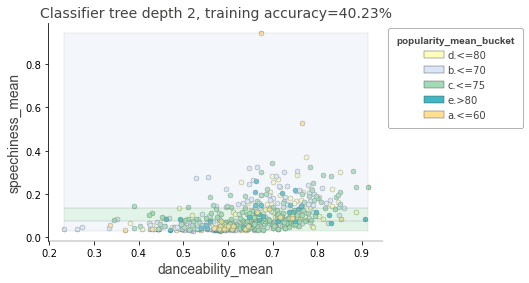

|--- feature_1 <= 0.07
|   |--- feature_0 <= 0.58
|   |   |--- class: 1
|   |--- feature_0 >  0.58
|   |   |--- class: 2
|--- feature_1 >  0.07
|   |--- feature_1 <= 0.13
|   |   |--- class: 2
|   |--- feature_1 >  0.13
|   |   |--- class: 1



In [28]:
x1,x2 = ("danceability_mean", "speechiness_mean")
X=artist_subset[[x1,x2]]
y=artist_subset["popularity_mean_bucket"]

class_names=list(artist_subset["popularity_mean_bucket"].unique())
y = y.map({n: i for i, n in enumerate(class_names)})

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

ctreeviz_bivar(dt, X, y, feature_names = [x1,x2],
                    class_names=class_names,
                    target_name='popularity_mean_bucket')
# plt.tight_layout()
plt.show()

viz = dtreeviz(dt, X, y,
                target_name="popularity_mean_bucket",
                feature_names=[x1,x2],
                class_names=class_names)

viz

text_representation = tree.export_text(dt)
print(text_representation)

In [36]:
np.unique(dt.predict(X))

array([1, 2, 4])

In [37]:
artist_subset["danceability_speechiness_feat"] = dt.predict(X)

<ipython-input-37-1e608b52ca2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_subset["danceability_speechiness_feat"] = dt.predict(X)


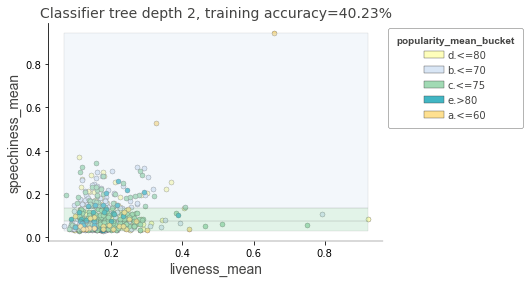

|--- feature_1 <= 0.07
|   |--- feature_0 <= 0.16
|   |   |--- class: 1
|   |--- feature_0 >  0.16
|   |   |--- class: 2
|--- feature_1 >  0.07
|   |--- feature_1 <= 0.13
|   |   |--- class: 2
|   |--- feature_1 >  0.13
|   |   |--- class: 1



In [29]:
x1,x2 = ("liveness_mean", "speechiness_mean")
X=artist_subset[[x1,x2]]
y=artist_subset["popularity_mean_bucket"]

class_names=list(artist_subset["popularity_mean_bucket"].unique())
y = y.map({n: i for i, n in enumerate(class_names)})

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

ctreeviz_bivar(dt, X, y, feature_names = [x1,x2],
                    class_names=class_names,
                    target_name='popularity_mean_bucket')
# plt.tight_layout()
plt.show()

viz = dtreeviz(dt, X, y,
                target_name="popularity_mean_bucket",
                feature_names=[x1,x2],
                class_names=class_names)

viz

text_representation = tree.export_text(dt)
print(text_representation)

In [38]:
artist_subset["liveness_speechiness_feat"] = dt.predict(X)

<ipython-input-38-15a10e31e685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_subset["liveness_speechiness_feat"] = dt.predict(X)


### Tukey Test on groups

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [46]:
feats = ["liveness_speechiness_feat","danceability_speechiness_feat","length_speechiness_feat"]

In [48]:
joined = df_org.merge(artist_subset[feats].reset_index(),left_on= ["artist"],\
                      right_on=["artist"],how="left",suffixes=("","_artist"))
joined.count()

name                             4576
album                            4576
artist                           4576
release_date                     4576
length                           4576
popularity                       4576
danceability                     4576
acousticness                     4576
energy                           4576
instrumentalness                 4576
liveness                         4576
loudness                         4576
speechiness                      4576
tempo                            4576
time_signature                   4576
days_since                       4576
liveness_speechiness_feat        4379
danceability_speechiness_feat    4379
length_speechiness_feat          4379
dtype: int64

In [53]:
joined[feats] = joined[feats].fillna(999)

In [56]:
def ad_tukey(grp="",reponse=""): 
    tukey = pairwise_tukeyhsd(endog=joined[response],
                          groups=joined[grp],alpha=0.01)
    sns.boxplot(data=joined, x=grp, y=response)
    plt.show()
    print (tukey)

Group Variable: liveness_speechiness_feat, Response Variable: popularity


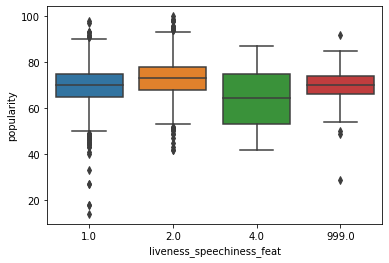

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   1.0    2.0   2.9491 0.001   2.1797  3.7185   True
   1.0    4.0   -4.975 0.001  -8.3129 -1.6372   True
   1.0  999.0  -0.1629   0.9  -2.0388  1.7129  False
   2.0    4.0  -7.9241 0.001 -11.2493  -4.599   True
   2.0  999.0   -3.112 0.001  -4.9653 -1.2588   True
   4.0  999.0   4.8121 0.001   1.0726  8.5515   True
----------------------------------------------------

Group Variable: danceability_speechiness_feat, Response Variable: popularity


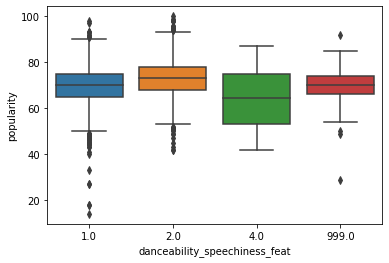

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   1.0    2.0   2.9491 0.001   2.1797  3.7185   True
   1.0    4.0   -4.975 0.001  -8.3129 -1.6372   True
   1.0  999.0  -0.1629   0.9  -2.0388  1.7129  False
   2.0    4.0  -7.9241 0.001 -11.2493  -4.599   True
   2.0  999.0   -3.112 0.001  -4.9653 -1.2588   True
   4.0  999.0   4.8121 0.001   1.0726  8.5515   True
----------------------------------------------------

Group Variable: length_speechiness_feat, Response Variable: popularity


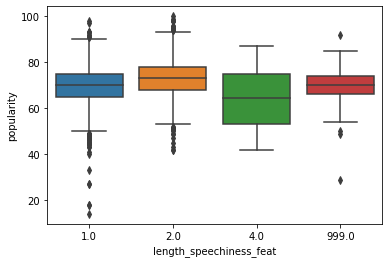

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   1.0    2.0   2.9491 0.001   2.1797  3.7185   True
   1.0    4.0   -4.975 0.001  -8.3129 -1.6372   True
   1.0  999.0  -0.1629   0.9  -2.0388  1.7129  False
   2.0    4.0  -7.9241 0.001 -11.2493  -4.599   True
   2.0  999.0   -3.112 0.001  -4.9653 -1.2588   True
   4.0  999.0   4.8121 0.001   1.0726  8.5515   True
----------------------------------------------------



In [57]:
response = "popularity"
for grp in ["liveness_speechiness_feat","danceability_speechiness_feat","length_speechiness_feat"]:
    print (f"Group Variable: {grp}, Response Variable: {response}")
    ad_tukey(grp,response)
    print()